In [1]:
import pandas as pd
import matplotlib as plt
import numpy as np

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("penguins_lter.csv")
df.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


In [127]:
class Dataset:
    def __init__(self, csv):
        self.df = pd.read_csv(csv)
        columns_to_drop = ['studyName', 'Individual ID', 'Date Egg', 'Sample Number', 'Comments']
        
        self.df.drop(columns=columns_to_drop, axis=1, inplace=True)
        self.df = self.df.dropna()
        column_names = self.df.columns
        self.mod_df = pd.get_dummies(self.df, columns=['Region', 'Island', 'Stage', 'Clutch Completion', 'Sex'], prefix='Category',dtype = int)
        
    def print_df(self):
        return self.mod_df
    
    def hist(self):
        hgram = self.df.hist(color = 'g',figsize=(15, 10))
        return hgram
    
    def describe(self):
        return self.df.describe()
    
    def correlation(self):
        correlation_matrix = self.df.corr(numeric_only=True)
        return correlation_matrix
    
    def normalize_and_standardize_columns(self, columns):
        # Нормализация
        min_max_scaler = MinMaxScaler()
        self.mod_df[columns] = min_max_scaler.fit_transform(self.mod_df[columns])

        # Стандартизация
        standard_scaler = StandardScaler()
        self.mod_df[columns] = standard_scaler.fit_transform(self.mod_df[columns])
        return self.mod_df
    
    def encoding_species(self):
        self.target = pd.DataFrame({'Species': self.df['Species']})
        self.mod_df.drop(columns=['Species'], axis=1, inplace=True)
        self.target = pd.get_dummies(self.target, columns=['Species'], prefix='Category', dtype = int)
        return self.target
    
    def train_test(self):
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.mod_df, self.target, test_size=0.2, random_state=42)
        return self.X_train, self.X_test, self.y_train, self.y_test
    
    def naive_bayes(self):
        imputer = SimpleImputer(strategy='most_frequent')
        self.X_train = imputer.fit_transform(self.X_train)
        self.X_test = imputer.transform(self.X_test)

        classifier = GaussianNB()
        classifier.fit(self.X_train, self.y_train.idxmax(axis=1))

        y_pred = classifier.predict(self.X_test)
        accuracy = accuracy_score(self.y_test.idxmax(axis=1), y_pred)
        print(f"Точность классификации NB: {accuracy}")
        return accuracy
        
    def gradient_boosting(self):
        imputer = SimpleImputer(strategy='most_frequent')
        model = make_pipeline(imputer, GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42))
        model.fit(self.X_train, self.y_train.idxmax(axis=1))  
        y_pred = model.predict(self.X_test)
        accuracy = accuracy_score(self.y_test.idxmax(axis=1), y_pred)
        print(f"Точность классификации GB: {accuracy}")
        return accuracy
    
    def KNN(self):
        imputer = SimpleImputer(strategy='most_frequent')
        self.X_train = imputer.fit_transform(self.X_train)
        self.X_test = imputer.transform(self.X_test)
        
        
        model = KNeighborsClassifier(n_neighbors=1)
        model.fit(self.X_train, self.y_train)
        y_pred = model.predict(self.X_test)

        # Оценка точности
        accuracy = accuracy_score(self.y_test, y_pred)
        print(f'Точность классификации KNN: {accuracy}')


In [128]:
penguins = Dataset("penguins_lter.csv")
penguins.df

,Species,Region,Island,Stage,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",Yes,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454
2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",Yes,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302
4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",Yes,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426
5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",Yes,39.3,20.6,190.0,3650.0,MALE,8.66496,-25.29805
6,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",No,38.9,17.8,181.0,3625.0,FEMALE,9.18718,-25.21799
...,...,...,...,...,...,...,...,...,...,...,...,...
338,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",No,47.2,13.7,214.0,4925.0,FEMALE,7.99184,-26.20538
340,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",Yes,46.8,14.3,215.0,4850.0,FEMALE,8.41151,-26.13832
341,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",Yes,50.4,15.7,222.0,5750.0,MALE,8.30166,-26.04117
342,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",Yes,45.2,14.8,212.0,5200.0,FEMALE,8.24246,-26.11969


In [129]:
penguins.print_df()

,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo),Category_Anvers,Category_Biscoe,Category_Dream,Category_Torgersen,"Category_Adult, 1 Egg Stage",Category_No,Category_Yes,Category_.,Category_FEMALE,Category_MALE
1,Adelie Penguin (Pygoscelis adeliae),39.5,17.4,186.0,3800.0,8.94956,-24.69454,1,0,0,1,1,0,1,0,1,0
2,Adelie Penguin (Pygoscelis adeliae),40.3,18.0,195.0,3250.0,8.36821,-25.33302,1,0,0,1,1,0,1,0,1,0
4,Adelie Penguin (Pygoscelis adeliae),36.7,19.3,193.0,3450.0,8.76651,-25.32426,1,0,0,1,1,0,1,0,1,0
5,Adelie Penguin (Pygoscelis adeliae),39.3,20.6,190.0,3650.0,8.66496,-25.29805,1,0,0,1,1,0,1,0,0,1
6,Adelie Penguin (Pygoscelis adeliae),38.9,17.8,181.0,3625.0,9.18718,-25.21799,1,0,0,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,Gentoo penguin (Pygoscelis papua),47.2,13.7,214.0,4925.0,7.99184,-26.20538,1,1,0,0,1,1,0,0,1,0
340,Gentoo penguin (Pygoscelis papua),46.8,14.3,215.0,4850.0,8.41151,-26.13832,1,1,0,0,1,0,1,0,1,0
341,Gentoo penguin (Pygoscelis papua),50.4,15.7,222.0,5750.0,8.30166,-26.04117,1,1,0,0,1,0,1,0,0,1
342,Gentoo penguin (Pygoscelis papua),45.2,14.8,212.0,5200.0,8.24246,-26.11969,1,1,0,0,1,0,1,0,1,0


array([[<Axes: title={'center': 'Culmen Length (mm)'}>,
        <Axes: title={'center': 'Culmen Depth (mm)'}>],
       [<Axes: title={'center': 'Flipper Length (mm)'}>,
        <Axes: title={'center': 'Body Mass (g)'}>],
       [<Axes: title={'center': 'Delta 15 N (o/oo)'}>,
        <Axes: title={'center': 'Delta 13 C (o/oo)'}>]], dtype=object)

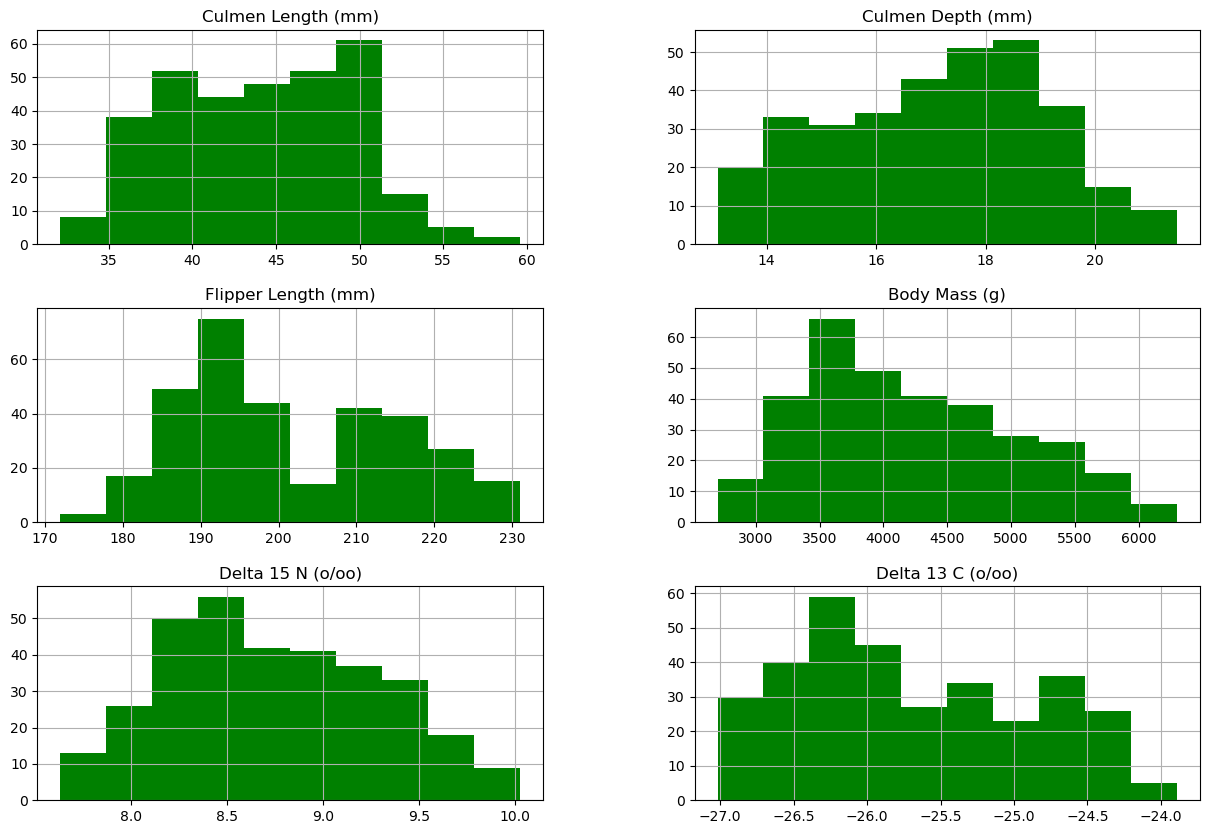

In [130]:
penguins.hist()

In [131]:
penguins.encoding_species()

,Category_Adelie Penguin (Pygoscelis adeliae),Category_Chinstrap penguin (Pygoscelis antarctica),Category_Gentoo penguin (Pygoscelis papua)
1,1,0,0
2,1,0,0
4,1,0,0
5,1,0,0
6,1,0,0
...,...,...,...
338,0,0,1
340,0,0,1
341,0,0,1
342,0,0,1


In [132]:
penguins.describe()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
count,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000
mean,44.054769,17.123077,201.264615,4216.000000,8.737794,-25.690217
std,5.472226,1.965942,13.964598,808.859222,0.552581,0.790098
min,32.100000,13.100000,172.000000,2700.000000,7.632200,-27.018540
25%,39.500000,15.600000,190.000000,3550.000000,8.302310,-26.326010
50%,44.900000,17.300000,197.000000,4050.000000,8.658030,-25.852030
75%,48.700000,18.600000,213.000000,4800.000000,9.180210,-25.060200
max,59.600000,21.500000,231.000000,6300.000000,10.025440,-23.890170


In [133]:
penguins.correlation().style.background_gradient(cmap='coolwarm')

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
Culmen Length (mm),1.000000,-0.222922,0.647947,0.591315,-0.057119,0.188244
Culmen Depth (mm),-0.222922,1.000000,-0.575852,-0.471138,0.600344,0.420819
Flipper Length (mm),0.647947,-0.575852,1.000000,0.877283,-0.503779,-0.376786
Body Mass (g),0.591315,-0.471138,0.877283,1.000000,-0.541091,-0.373011
Delta 15 N (o/oo),-0.057119,0.600344,-0.503779,-0.541091,1.000000,0.570088
Delta 13 C (o/oo),0.188244,0.420819,-0.376786,-0.373011,0.570088,1.000000


In [134]:
columns_to_process = ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)']
penguins.normalize_and_standardize_columns(columns_to_process)

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo),Category_Anvers,Category_Biscoe,Category_Dream,Category_Torgersen,"Category_Adult, 1 Egg Stage",Category_No,Category_Yes,Category_.,Category_FEMALE,Category_MALE
1,-0.833626,0.141077,-1.094779,-0.515098,0.383822,1.262138,1,0,0,1,1,0,1,0,1,0
2,-0.687208,0.446745,-0.449299,-1.196116,-0.669863,0.452789,1,0,0,1,1,0,1,0,1,0
4,-1.346090,1.109025,-0.592739,-0.948473,0.052047,0.463893,1,0,0,1,1,0,1,0,1,0
5,-0.870231,1.771306,-0.807899,-0.700830,-0.132010,0.497118,1,0,0,1,1,0,1,0,0,1
6,-0.943440,0.344856,-1.453380,-0.731785,0.814503,0.598603,1,0,0,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,0.575649,-1.743874,0.913383,0.877895,-1.352025,-0.653030,1,1,0,0,1,1,0,0,1,0
340,0.502440,-1.438206,0.985103,0.785029,-0.591382,-0.568024,1,1,0,0,1,0,1,0,1,0
341,1.161322,-0.724981,1.487143,1.899423,-0.790483,-0.444874,1,1,0,0,1,0,1,0,0,1
342,0.209603,-1.183483,0.769943,1.218404,-0.897782,-0.544408,1,1,0,0,1,0,1,0,1,0


In [135]:
penguins.train_test()

(     Culmen Length (mm)  Culmen Depth (mm)  Flipper Length (mm)  \
 185            1.271135           0.854302             0.124462   
 196            1.252833           0.395801            -0.377579   
 26            -0.632301           0.752413            -1.309940   
 33            -0.577395           0.905247            -1.238219   
 145           -0.925138           0.803358            -1.166499   
 ..                  ...                ...                  ...   
 201            1.051508           0.090133            -0.234138   
 84            -1.236277           0.344856            -0.736179   
 119           -0.540790           0.752413            -0.879619   
 287            0.996601          -0.470258             1.989184   
 115           -0.247954           0.599579            -0.377579   
 
      Body Mass (g)  Delta 15 N (o/oo)  Delta 13 C (o/oo)  Category_Anvers  \
 185      -0.143633           0.895666           1.923479                1   
 196      -0.669875       

# KNN


In [136]:
penguins.KNN()

Точность классификации KNN: 1.0


# Gradient Boosting

In [137]:
penguins.gradient_boosting()

Точность классификации GB: 0.9846153846153847


0.9846153846153847

# Naive Bayes


In [138]:
penguins.naive_bayes()

Точность классификации NB: 0.8923076923076924


0.8923076923076924